In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [2]:
def deploy_function():
    def score(payload):
        str123 = payload["values"][0]
        slot = 1
        str_ar = str123.split(' ')
        str_ar1 = []
        for i in range(len(str_ar)):
            str_ar1.append(int(str_ar[i]))
        ar = str_ar1
        total_length = len(ar)
        def float_range(start,stop,step):
            lst = []  
            i = start
            while i < stop:
                lst.append(i)
                i = i + step
            return lst

        def calc_area_trap(first_height, second_height, base):
            rect_area =  min(first_height,second_height) * base
            triangle_area = 0.5 * (max(first_height,second_height) - min(first_height,second_height)) * base
            return rect_area + triangle_area

        def calc_height(prevh,nexth,frac):
            if nexth >= prevh:
                h = prevh + (nexth-prevh) * frac
            else:
                h = nexth + (prevh - nexth) * (1-frac)
            return abs(h)

        return_str = ''
        for slot in range(1,4):
            max_energy = -1
            start_time = -1
            for start_point in float_range(0,total_length - 1 - slot, 0.05):
                energy = 0        
                for i in range(slot):
                    esp = start_point + i
                    frac = esp - int(esp)
                    energy += calc_area_trap(calc_height(ar[int(esp)],ar[int(esp)+1],frac),ar[int(esp)+1],1-frac)
                    energy += calc_area_trap(ar[int(esp) + 1],calc_height(ar[int(esp) + 1],ar[int(esp) + 2],frac),frac)

                if(energy > max_energy):
                    max_energy = energy
                    start_time = start_point

            start_time1 = int(int(start_time) * 60 + ((start_time - int(start_time)) * 3)/0.05)  
            return_str +=  str(max_energy/slot) + ' '+ str(start_time1) + ' '
        return {"Result" : return_str}

    return score

In [3]:
lst = []
for i in range(24):
    lst.append(random.random()*3600)

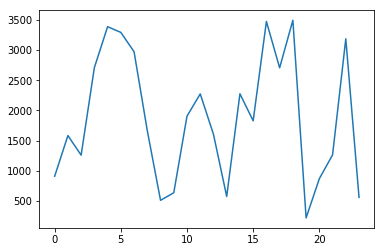

In [4]:
plt.plot(lst)

In [5]:
wml_credentials = {
  "apikey": "rWBYMMAvXLpT0poX4fMQBdWofu7mWvKRg2zMaAdvjV9z",
  "iam_apikey_description": "Auto-generated for key 3f4a5270-1f86-4809-bc4d-da42cd90a0ab",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/5c1ce8fd5a6e46a49cc3f25144e7c0ab::serviceid:ServiceId-b2a5850b-6647-4a97-8110-4ba3c1ef69e0",
  "instance_id": "89def234-5ebd-4907-a37b-e59d988f9286",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [6]:
deploy_function()({"values":["105 105 10 85 85 105"]})

{'Result': '105.0 0 89.99999999999997 179 74.2979166666667 117 '}

In [7]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [8]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [9]:
meta_data = {client.repository.FunctionMetaNames.NAME : 'Maximum_Power_Output'}

In [10]:
function_details = client.repository.store_function(meta_props=meta_data, function=deploy_function)

No matching default runtime found. Creating one...SUCCESS

Successfully created runtime with uid: 474b3056-5544-449f-a4ee-8cddfbec89e5


In [11]:
function_id = function_details['metadata']['guid']

In [12]:
function_id

'414f3888-3ace-4749-bd4f-29e8606983d0'

In [ ]:
function_deployment_details = client.deployments.create(artifact_uid=function_id, name= 'Maximum_Power_Output')




#######################################################################################

Synchronous deployment creation for uid: '414f3888-3ace-4749-bd4f-29e8606983d0' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS.

In [ ]:
function_deployment_details

In [ ]:
import requests

In [ ]:
function_deployment_endpoint_url = client.deployments.get_scoring_url( function_deployment_details )
payload = { "values" : [ '1 2 3 4 5 6 7 8 9 1 2 3 4 5 6 7 8 9 1 2 3 4 5 5 1' ] }

# Send data to deployment for processing
client.deployments.score( function_deployment_endpoint_url, payload )

In [ ]:
url     = "https://iam.bluemix.net/oidc/token"
headers = { "Content-Type" : "application/x-www-form-urlencoded" }
data    = "apikey=" + wml_credentials["apikey"] + "&grant_type=urn:ibm:params:oauth:grant-type:apikey"
IBM_cloud_iam_uid = "bx"
IBM_cloud_iam_pwd = "bx"
response  = requests.post( url, headers=headers, data=data, auth=( IBM_cloud_iam_uid, IBM_cloud_iam_pwd ) )

if 200 != response.status_code:
    print( response.status_code )
    print( response.reason )
else:
    iam_token = response.json()["access_token"]
    
    # Send data to deployment for processing
    headers = { "Content-Type" : "application/json", 
                "Authorization" : "Bearer " + iam_token,
                "ML-Instance-ID" : wml_credentials["instance_id"] }
    response = requests.post( function_deployment_endpoint_url, json=payload, headers=headers )
    print ( response )

In [ ]:
client.deployments.list()

In [ ]:
client.deployments.delete("0a45afa2-1d5e-4052-a977-99ab930e1e41")